## **Movie Industry Analysis: Data-Driven Insights for New Movie Production**

## 1.0 Business Understanding

This section outlines the project's goal, the key business questions being addressed and identifies the key stakeholder who will use the insights for strategic decision making.

### 1.1 Project Overview

The film industry is competitive and financially demanding. A new movie studio aiming to enter the market must make informed decisions about the types of films to produce. To improve the likelihood of success, it is important to understand the factors that drive box office performance.  

This project analyzes movie data from different sources to identify key factors that include genre, budget, release timing and audience ratings that influence performance. The key findings will support informed decision making for future film projects.

### 1.2 Project Goal

The objective of this project is to provide data driven recommendations that can guide the studio in choosing which types of movies to produce. By analyzing data, the project aims to know which features are most associated with higher box office returns. This information will help the studio prioritize projects with higher commercial potential.

### 1.3 Business Stakeholder 
  
The primary stakeholder is the head of the company’s new movie studio who needs clear insights that are driven by data to decide which film projects to approve and how to allocate production resources.

### 1.4 Key Business Questions

To ensure the analysis is relevant to the stakeholder's needs, the following actionable business questions were defined:

1. Which movie genres have the highest average box office revenue?  
2. How does production budget influence gross earnings?
3. Which release months are associated with higher box office performance?

The notebook will answer these business questions through data cleaning, exploration, analysis and visualization to inform data driven and actionable recommendations.

## 2.0 Data Understanding

This section introduces the movie datasets provided in the zipped project folder. The data comes from multiple online sources including Box Office Mojo, IMDB, Rotten Tomatoes, The Movie Database (TMDb) and The Numbers.

The aim is to understand the structure and contents of the datasets. This involves identifying useful columns, checking file formats such as CSV, TSV and SQLite and also deciding which datasets will best help answer the business questions.

By previewing the data, it is possible to spot any issues like missing or inconsistent values early on and start thinking about how to clean and merge the data for further analysis.

### 2.1 Dataset Overview

The project uses multiple datasets sourced from the zipped project folder. These datasets come from different online platforms and provide additional information about movies to support the business questions. The datasets are as follows:

- **Box Office Mojo (bom.movie_gross.csv.gz)**: Contains box office revenue for films released in the United States (U.S.).
- **IMDb (im.db)**: A SQLite database with movie details like titles, genres, release years and ratings.
- **The Numbers (tn.movie_budgets.csv.gz)**: Contains data on movie production budgets and worldwide gross revenue.
- **TMDb (tmdb.movies.csv.gz)**: Provides additional information like vote counts, popularity scores and average ratings from users.
- **Rotten Tomatoes (rt.movie_info.tsv.gz, rt.reviews.tsv.gz)**: Contains critic and audience scores. 

These files come in two formats. There are compressed CSV files (csv.gz) and a zipped SQLite database (.zip)

Before beginning the data analysis, the following should be considered: Understanding what each dataset contains, identifying  which datasets best address the business questions and checking for issues like inconsistent formats or missing values. In addition, planning the best cleaning and merging strategy.

This will guide the selection and preparation of the final datasets used for exploratory data analysis.


### 2.2 Loading and Previewing the Data

The required Python libraries for data analysis and visualization are first imported. The datasets are then loaded into pandas DataFrames from their file formats including compressed CSV files (.csv.gz) and a SQLite database (.db).

After loading, inspection methods are used to preview the data, confirm successful loading and understand each dataset’s structure.

This allows for cleaning, merging and further data exploration.


#### 2.2.1 Importing Required Libraries

In [6]:
# Import required libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns

### 2.2.2 Loading and Previewing the Box Office Mojo Dataset

The Box Office Mojo (BOM) dataset contains information about domestic box office earnings for movies released in the U.S. It includes information such as movie titles, release dates, studios and gross earnings.

In this section, the file is loaded into a pandas DataFrame and basic inspection methods are applied to understand the structure.

In [7]:
# Load the Box Office Mojo dataset
bom_df = pd.read_csv("C:/Users/Jessica/OneDrive/Phase-2/Phase_2_Project/Data/bom.movie_gross.csv.gz")


# Preview the first five rows
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Each row in the dataset represents a movie released in the U.S. The columns include the movie title, studio, domestic and foreign gross earnings and the release year. This information will help evaluate box office performance across different films.


### 2.2.3 Box Office Mojo Dataset Structure

This section covers the review of the basic details of the dataset.

In [8]:
# Display data types
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
# Display summary statistics
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


The statistical overview of numeric columns in the Box Office Mojo dataset is as follows:

- domestic_gross shows large differences in values ranging from 100 to over 936 million showing the presence of extreme outliers.

- The mean domestic gross is about 28.7 million while the median is 1.4 million which can mean that the distribution is right skewed.

- The year column is from 2010 to 2018 covering a 9 year range of movie releases.

- These insights are useful for understanding earnings distribution and showing if there is need for cleaning or fixing the data.

In [10]:
# Check for missing values
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The review of missing values in the Box Office Mojo dataset shows the following:

- foreign_gross has 1,350 missing entries, the most among all columns.

- domestic_gross is missing 28 values.

- studio has 5 missing entries.

- title and year have no missing values.

- These missing entries indicate that some data may need cleaning before analysis and merging with other datasets.

In [11]:
# Check the shape of the dataset
bom_df.shape

(3387, 5)

The dataset has 3387 rows and 5 columns.

### 2.2.4 Box Office Mojo Key Observations

Based on the initial loading and structure review of the Box Office Mojo dataset, the following key observations were made:

- The dataset has 3,387 rows and 5 columns, representing movies released in the U.S.

- Key columns include the title, studio, domestic_gross, foreign_gross and year.

- The domestic_gross column is in float format, while foreign_gross is in object format, showing possible issues like formatting or missing values that may need cleaning.

- The domestic_gross has a wide range of values, from $100 to over $936 million, showing that there are outliers and a right skewed distribution.

- The year column is from 2010 to 2018, giving a 9 year coverage of movie releases.

- Missing values exist in the following: foreign_gross with 1,350 entries, domestic_gross with 28 entries and studio with 5 entries. All movies have complete values for title and year.

- The BOM dataset is important for answering business questions related to revenue performance by genre, budget and release timing, and will require cleaning before merging with other datasets.

### 2.2.5 Loading and Previewing The Numbers Dataset

The Numbers dataset provides information on movie production budgets and worldwide box office earnings. It includes details such as release dates, movie titles, production budgets, domestic gross and worldwide gross.

In this section, the file is loaded into a pandas DataFrame and inspection methods are used to understand its structure and identify any issues.


In [12]:
# Load The Numbers dataset
tn_df = pd.read_csv("C:/Users/Jessica/OneDrive/Phase-2/Phase_2_Project/Data/tn.movie_budgets.csv.gz")

# Preview the first five rows
tn_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Each row in The Numbers dataset represents a movie along with its financial performance and release details.
The key columns include the release date, movie title, production budget, domestic gross and worldwide gross earnings.
This information is useful for analyzing how budget and release timing affect revenue performance across different films.

### 2.2.6 The Numbers Dataset Structure

This section covers the review of the basic details of the dataset.

In [13]:
# Display data types 
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
# Display summary statistics
tn_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


The summary statistics for the numeric column id in The Numbers dataset are as follows:

- The id column is from 1 to 100 with a mean of 50.37 and a median of 50. This could mean the IDs are uniformly distributed.

- This column serves as a unique identifier therefore no additional analysis is required.

- No other numeric columns are shown as their data type is non-numeric.

- These statistics are useful in confirming the structure of the data and identifying if type conversion will be necessary during cleaning.

In [15]:
# Check for missing values
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The check for missing values shows the following:

- All columns have zero missing values meaning the dataset is complete and no records need to be dropped due to null entries.

- However, further cleaning might still be needed for formatting especially for financial columns stored as strings.

In [16]:
# Check the shape of the dataset
tn_df.shape

(5782, 6)

The dataset has 5782 rows and 6 columns.

### 2.2.7 The Numbers Key Observations

Based on the initial loading and structure review of The Numbers dataset, the following key observations were made:

- The dataset has 5,782 rows and 6 columns each representing a movie with associated financial data.

- Key columns include release_date, movie, production_budget, domestic_gross and worldwide_gross which are important for analyzing budget impact and revenue performance.

- All columns contain non-null values showing there are no missing entries.

- The numeric ID column ranges from 1 to 100 confirming that it acts as a unique identifier.

- The production_budget, domestic_gross and worldwide_gross are in object format, which might mean there are formatting issues that will require cleaning.

- This dataset will be useful for answering business questions around how budget and release dates affect movie earnings.


### 2.2.8 Loading and Previewing the IMDb Dataset

The IMDb dataset is stored in a zipped SQLite database file (im.db.zip). It contains several linked tables with information about movie titles, genres, release years and ratings.

In this section, the database is extracted and connected using SQLite. SQL queries are used to preview the relevant tables especially those that contain movie title details, genre classifications and ratings.

This is to understand the structure and identify the data needed for further analysis.


In [17]:
# Extract the zipped file
zip_path = ("C:/Users/Jessica/OneDrive/Phase-2/Phase_2_Project/Data/im.db.zip")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("Unzipped_Data")

# Load the IMDb Database
conn = sqlite3.connect("C:/Users/Jessica/OneDrive/Phase-2/Phase_2_Project/Unzipped_Data/im.db")
conn

# List all tables in the IMDb database
IM_data = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table'", conn)
IM_data



,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


The IMDb database has various tables. These are movie_basics, directors, known_for, movie_akas, movie_ratings, persons, principals and writers.

For this analysis, movie_basics and movie_ratings are the most relevant tables. They provide the data necessary to answering the business questions focused on genres and performance, as they include details like genres, start years and ratings.

In [18]:
# Preview the movie_basics table
movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


The movie_basics table contains key movie information such as the movie ID, title, original title, release year, runtime and genre. These columns are useful for identifying film characteristics needed to explore genre performance and release trends, which are key to our business questions.

In [ ]:
# Preview the movie_ratings table
movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_ratings_df 

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


The movie_ratings table includes IMDb ratings for each movie, featuring the average rating and number of votes. This helps assess movie popularity which is important when analyzing the performance and success of films across genres and time periods.

### 2.2.9 The IMDb Dataset Structure

This section covers the review of the basic details of the dataset.

In [643]:
# Display the data types of the movie_basics table
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [644]:
# Display summary statistics for the movie_basics table
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


The summary statistics for the movie_basics table is as follows:

- The start_year column has values ranging from 2010 to 2115 with a mean of 2014.6. This shows some future dated entries that may need to be checked.

- The runtime_minutes column has a high standard deviation of over 166 with some extreme values such as max of 51420 that can mean potential outliers or data entry errors.

In [645]:
# Check for missing values for the movie_basics table
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

The missing values show the following:

- original_title has 21 missing entries

- runtime_minutes has 31,739 missing entries

- genres has 5,408 missing entries

- These columns need further review during data cleaning.


In [646]:
# Check the shape and structure of the movie_basics table
movie_basics_df.shape


(146144, 6)

The movie_basics table has 146144 rows and 6 columns.

In [647]:
# Display the data types of the movie_ratings table
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [648]:
# Display summary statistics for the movie_ratings table
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The statistical summary method shows that:

- average_rating ranges from 1 to 10 with a mean of 6.33 which could mean a balanced distribution of user ratings.

- num_votes shows a wide spread that is ranging from 5 to over 1.84 million votes showing that there are some popular movies compared to others with reduced engagement.


In [649]:
# Check for missing values for the movie_ratings table
movie_ratings_df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

There are no missing values in the movie_ratings table.


In [650]:
# Check the shape and structure of the movie_ratings table
movie_ratings_df.shape

(73856, 3)

The movie_ratings table has 73856 rows and 3 columns.

Based on the structure and summary statistics of the IMDb dataset; the movie_basics and movie_ratings tables, the following key observations were made:

- The movie_basics table contains 146,144 rows and 6 columns covering movie information such as titles, genres and runtime.

- Key columns include movie_id, primary_title, start_year, runtime_minutes and genres.

- The runtime_minutes column has a high standard deviation and an outlier with a value of 51,420 which might mean there are incorrect or extreme values needing cleaning.

- The start_year ranges from 2010 to 2115 showing future dated entries that may need to be excluded or corrected.

- Missing values were found in original_title with 21 entries, runtime_minutes with 31,739 entries and genres with 5,408 entries which will need attention in the cleaning stage.

- The movie_ratings table has 73,856 rows and 3 columnswhich has user rating data.

- There are no missing values in the movie_ratings table.

- average_rating ranges from 1 to 10 while num_votes ranges widely up to 1.8 million votes showing varying popularity and reliability of ratings.

- The IMDb dataset is important for analyzing popularity of movies and how it relates with factors such as runtime, genre and release year.


## 2.3 Dataset Justification

The selected three datasets are Box Office Mojo, The Numbers and IMDb. These datasets were chosen because they each focus on different but important aspects of movies, and when combined, they give a complete picture of movie performance.

- **Box Office Mojo** includes how much money movies made in the U.S. and internationally. This is helpful for comparing performance by region and analyzing revenue trends.

- **The Numbers** provides details like production budgets and worldwide gross. This allows for insights into how much was spent versus how much was earned, helping analyze profits and return on investment.

- **IMDb** adds more information about each movie, such as the title, genre, runtime, release year and audience ratings. This makes it easier to group movies, understand trends and explore how features like genre or rating relate to success.

By combining these three sources, it is possible to address the business questions.

Together, these datasets support a deeper and well rounded analysis of what drives movie performance.

## 3.0 Data Preparation

In this section, the selected datasets; Box Office Mojo, The Numbers and IMDb are cleaned and prepared for analysis. The cleaning process involves the following:

- Standardizing column names

- Fixing incorrect data types

- Handling missing values and duplicates

- Keeping only relevant columns

This ensures that the data is consistent, accurate and ready for merging and analysis in the next steps.

### 3.1 Cleaning the Box Office Mojo Dataset

This section involves the cleaning of the Box Office Mojo Dataset.

#### 3.1.1 Standardizing Column Names for the Box Office Mojo Dataset

Column names are cleaned by:
- Making all letters lowercase.

- Replacing spaces with underscores.

- Removing any leading spaces.

This makes the dataset easier to work with and more consistent when merging or analyzing.

In [651]:
# Make column names lowercase
bom_df.columns = bom_df.columns.str.lower()


In [652]:
# Remove any leading whitespace
bom_df.columns = bom_df.columns.str.strip()


In [653]:
# Replace spaces with underscores
bom_df.columns = bom_df.columns.str.replace(' ', '_')

#### 3.1.2 Fixing Data Types for the Box Office Mojo Dataset

To ensure correct data analysis, numeric columns such as gross earnings are converted from strings to numeric format. In addition, the year column is converted to integer type and any formatting issues are addressed.

In [654]:
# Convert domestic_gross and foreign_gross to numeric types
bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'], errors='coerce')
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')

# Convert year to integer 
bom_df['year'] = pd.to_numeric(bom_df['year'], errors='coerce')


In [655]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


This helps confirm that domestic_gross and foreign_gross are now numeric data types and year is an integer.

#### 3.1.3 Handling Missing Values for the Box Office Mojo Dataset

After converting data types, the dataset is checked for any missing values. Handling these values ensures the data is clean and ready for data analysis.


In [656]:
# Check for missing values
bom_df.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

The title and year columns do not have any missing values. However, the following columns have missing data:

- studio with 5 missing.

- domestic_gross with 28 missing.

- foreign_gross with 1355 missing.

The aim is to analyze revenue performance therefore rows will be dropped where revenue; domestic_gross or foreign_gross is missing. This is because it is not possible to estimate earnings without this data. Rows with missing studio will also be dropped for consistency.

This step helps ensure that the final dataset is accurate and complete for data analysis.


In [657]:
# Drop rows with missing revenue or studio data
bom_df.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)


In [658]:
# Confirm all missing values are removed
bom_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

This confirms that all the missing values are now removed.

#### 3.1.4 Removing Duplicate Rows for the Box Office Mojo Dataset

To avoid analysis errors or skewed results, it is important to check and remove any duplicate rows in the dataset.


In [659]:
# Check for duplicates
bom_df.duplicated().sum()


0

There are zero duplicate records.

#### 3.1.5 Keeping Only Relevant Columns for the Box Office Mojo Dataset

To prepare the dataset for analysis and merging, it is important to keep only the columns that are useful for answering the business questions and remove any others.


In [660]:
# View all column names
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

All current columns are relevant. There is no need to drop any columns.

#### 3.1.6 Resetting the Index for the Box Office Mojo Dataset


After cleaning the dataset, it is important to reset the index to ensure it is properly ordered and consistent.


In [661]:
# Reset index
bom_df.reset_index(drop=True, inplace=True)

# Confirm index reset
bom_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


#### 3.1.7 Key Observations

The Box Office Mojo dataset was cleaned to prepare it for analysis. The following steps were applied:

- Column names were standardized to lowercase for consistency.

- Data types were fixed by converting the revenue columns to numeric type and the year to integer.

- Missing values were checked and rows missing key data; studio or revenue were removed.

- Duplicate records were checked and zero were found.

- Index was reset to ensure rows are properly ordered after cleaning.

These steps ensure that the dataset is clean, consistent and ready for merging and further data analysis.


### 3.2 Cleaning The Numbers Dataset

This section involves the cleaning of the The Numbers Dataset.

#### 3.2.1 Standardizing Column Names for The Numbers Dataset

Column names are cleaned by; Making all letters lowercase, replacing spaces with underscores and removing any leading spaces.



In [701]:
# Reload The Numbers dataset
tn_data = pd.read_csv("C:/Users/Jessica/OneDrive/PHASE_2_PROJECT/Data/tn.movie_budgets.csv.gz")

# Preview the first few rows
tn_data.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
# Rename columns for consistency
tn_data.columns = tn_data.columns.str.lower().str.replace(" ", "_")

# Preview column names
tn_data.columns


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

This section makes the dataset easier to work with and more consistent when merging or analyzing.

#### 3.2.2 Fixing Data Types for The Numbers Dataset

In this section, the aim is to ensure each column is in the correct data type to allow for proper analysis.

In [703]:
# Convert release_date to datetime
tn_data['release_date'] = pd.to_datetime(tn_data['release_date'], errors='coerce')


This ensures that any date calculations or filtering will work properly.

In [704]:

# Remove $ and commas, then convert financial columns to numeric
money_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_columns:
    tn_data[col] = tn_data[col].replace('[\$,]', '', regex=True).astype(float)



To prepare the dataset for analysis, it is important to make sure that each column has the correct data type.

- The release_date column was converted to datetime format so that trends can be analyzed by date.

- The production_budget, domestic_gross and worldwide_gross columns were converted to numeric format so that calculations can be performed.

This step ensures that the data is ready for cleaning missing values.

#### 3.2.3 Handling Missing Values for The Numbers Dataset

In this section, the aim is to identify and remove rows with missing values in key columns so the dataset is clean and usable.

In [705]:
# Check for missing values
tn_data.isnull().sum()


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In this section, the dataframe was checked for missing values and confirmed that all key columns release_date, production_budget, domestic_gross and worldwide_gross had no null values. Therefore, no rows needed to be removed in this step.


#### 3.2.4 Removing Duplicate Rows on The Numbers Dataset

To ensure the dataset does not have repeated entries that could affect data analysis, it is important to check and remove any duplicate rows. Duplicate rows can lead to inaccurate summary statistics and visualizations, therefore important to remove them.


In [706]:
# Check for duplicate rows
tn_data.duplicated().sum()


0

This confirms that the dataset has no duplicate rows. Therefore, no further action is needed at this step.


#### 3.2.6 Keeping Only Relevant Columns for The Numbers Dataset

For analysis and merging, it is important in this step to retainonly the columns that are useful for answering the business questions.

In [707]:
# Keep only relevant columns
tn_data = tn_data[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'release_date']]

# Confirm structure
tn_data.head()


,movie,production_budget,domestic_gross,worldwide_gross,release_date
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009-12-18
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011-05-20
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019-06-07
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015-05-01
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017-12-15


The movie, production_budget, domestic_gross, worldwide_gross and release_date columns are retained as they will be useful for data analysis.

#### 3.2.5 Resetting the Index for The Numbers Dataset



In [710]:
# Reset the index
tn_data.reset_index(drop=True, inplace=True)


In [709]:
tn_data.shape

(5782, 5)

#### 3.2.6 Key Observations

- The dataset contains 5,782 rows and 5 columns after cleaning.

- Column names were standardized by converting to lowercase and replacing spaces with underscores for consistency and ease of use.

- The release_date column was successfully converted to datetime format, enabling time based analysis.

- The columns: production_budget, domestic_gross and worldwide_gross were cleaned by removing dollar signs and commas, then converted to numeric format to allow for mathematical operations.

- There were no missing values or duplicate rows, so no rows were dropped during cleaning.

- Only relevant columns: movie, production_budget, domestic_gross, worldwide_gross and release_date were kept to support further analysis and merging.



### 3.3 Cleaning the IMDb Dataset

The IMDb dataset provides information about movies, such as title, genre, release year and average ratings. This section will deal with cleaning and keeping only the relevant parts; the movie_basics and movie_ratings tables. This is to prepare them for merging and analysis. 


#### 3.3.1 Standardizing Column Names for the IMDb Dataset

To ensure consistency, column names in both IMDb tables were converted to lowercase and any spaces were replaced with underscores.

In [674]:
# Standardize column names to lowercase
movie_basics_df.columns = movie_basics_df.columns.str.lower().str.replace(' ', '_')

# Replace spaces with underscores
movie_ratings_df.columns = movie_ratings_df.columns.str.lower().str.replace(' ', '_')


#### 3.3.2 Fixing Data Types for the IMDb Dataset

In [675]:
# Check data types for movie_basics
print(movie_basics_df.dtypes)


movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object


In [676]:
# Check data types for movie_ratings
print(movie_ratings_df.dtypes)

movie_id          object
averagerating    float64
numvotes           int64
dtype: object


This helps to identify columns that may need conversion.

In [677]:
# Convert relevant columns in movie_basics_df
movie_basics_df['start_year'] = pd.to_numeric(movie_basics_df['start_year'], errors='coerce')
movie_basics_df['runtime_minutes'] = pd.to_numeric(movie_basics_df['runtime_minutes'], errors='coerce')


In [678]:
# Convert relevant columns in movie_ratings_df
movie_ratings_df['averagerating'] = pd.to_numeric(movie_ratings_df['averagerating'], errors='coerce')
movie_ratings_df['numvotes'] = pd.to_numeric(movie_ratings_df['numvotes'], errors='coerce')


The data types were reviewed to ensure that numeric values were stored correctly. Relevant columns such as start_year, runtime_minutes, averagerating and numvotes were converted from object to numeric formats to allow for analysis later on.


#### 3.3.3 Handling Missing Values for the IMDb Dataset

The IMDb dataset was checked for missing values to ensure completeness. Identifying and handling missing values at this stage ensures that only clean data is used for merging and further analysis.


In [679]:
# Check missing values in movie_basics dataframe
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [680]:
# Check missing values in movie_ratings dataframe
movie_ratings_df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

movie_basics_df has:

- original_title has 21 missing rows.

- runtime_minutes has 31,739 missing rows.

- genres: 5,408 missing rows.

movie_ratings_df has no missing values.

In [681]:
# Drop rows with missing original_title
movie_basics_df.dropna(subset=['original_title'], inplace=True)


In [682]:
# Fill missing runtime_minutes with median
median_runtime = movie_basics_df['runtime_minutes'].median()
movie_basics_df['runtime_minutes'].fillna(median_runtime, inplace=True)


In [683]:
# Fill missing genres with 'Unknown'
movie_basics_df['genres'].fillna('Unknown', inplace=True)


The movie_basics table had missing values in original_title, runtime_minutes, and genres. Since original_title is not key and only 21 rows were missing, these were dropped. The large number of missing values in runtime_minutes and genres were filled using the median and a placeholder.

In [684]:
# Confirm all missing values are handled
movie_basics_df.isnull().sum()


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

#### 3.3.4 Removing Duplicate Rows for the IMDb Dataset

To avoid analysis errors, it is important to check and remove any duplicate rows that may be present in the datasets.


In [699]:
# Check for duplicates in the movie_basics dataframe
movie_basics_df.duplicated().sum()


0

In [700]:
# Check for duplicates in the movie_ratings dataframe
movie_ratings_df.duplicated().sum()


0

There are zero duplicate records in both datasets.

#### 3.3.5 Keeping Only Relevant Columns in the IMDb Dataset

In this section, only the necessary columns are kept for analysis and merging from both IMDb tables.

In [685]:
# Keep only relevant columns from movie_basics
movie_basics_df = movie_basics_df[['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres']]


In [686]:
# Preview cleaned movie_basics
movie_basics_df.head()

,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [687]:
# Keep only relevant columns from movie_ratings
movie_ratings_df = movie_ratings_df[['movie_id', 'averagerating', 'numvotes']]

In [688]:
# Preview cleaned movie_ratings
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### 3.3.6  Resetting the Index of the IMDb 

In this section, resetting the index is important as it helps avoid index mismatches after dropping rows.

In [695]:
# Reset index for cleaned movie_basics dataframe
movie_basics_df.reset_index(drop=True, inplace=True)


In [697]:
# Confirm index reset
movie_basics_df.head()


,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [696]:
# Reset index for cleaned movie_ratings dataframe
movie_ratings_df.reset_index(drop=True, inplace=True)

In [698]:
# Confirm index reset
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### 3.3.7  Key Observations

- Only the relevant columns were retained: primary_title, genres, runtime_minutes, start_year, averagerating and numvotes.
- Column names were standardized to lowercase and underscores for consistency.
- The start_year column was converted to datetime format for easier sorting and filtering.
- The columns runtime_minutes, averagerating and numvotes were converted to numeric datatypes.
- There were no missing values or duplicate rows in the cleaned dataset.

The cleaned dataset is now ready to be used for merging and further data analysis.


## 4.0 Merging and Further Data Cleaning

This section involves merging the cleaned datasets and performing any final cleaning steps required for accurate analysis.

### 4.1 Standardizing Movie Titles Before Merging

To prepare for merging the datasets, it is important to ensure that movie titles are formatted consistently across all sources.

This includes:
- Removing extra spaces.

- Converting titles to lowercase.

- Stripping any special characters or punctuation where applicable.



In [713]:
# Standardize 'title' column in Box Office Mojo dataset
bom_df['title'] = bom_df['title'].str.strip().str.lower()


In [714]:
# Standardize 'movie' column in The Numbers dataset
tn_data['movie'] = tn_data['movie'].str.strip().str.lower()

In [ ]:
# Standardize 'primary_title' column in movie_basics dataset
movie_basics_df.loc[:, 'primary_title'] = movie_ratings_df['primary_title'].str.strip().str.lower()


In [721]:
# Standardize 'movie_id' column in movie_ratings dataset
movie_ratings_df['movie_id'] = movie_ratings_df['movie_id'].str.strip().str.lower()


In [722]:
# Step 1: Standardize column names in movie_ratings dataset (lowercase, remove spaces)
movie_ratings_df.columns = movie_ratings_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 2: Convert numeric columns to proper types
movie_ratings_df['averagerating'] = pd.to_numeric(movie_ratings_df['averagerating'], errors='coerce')
movie_ratings_df['numvotes'] = pd.to_numeric(movie_ratings_df['numvotes'], errors='coerce')

# Step 3: Check structure again
movie_ratings_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB



The above steps help reduce mismatches when merging.

### 4.2 Merging the Datasets

In this section, the merged datasets will be cleaned and standardized to create a dataset for data analysis.

The steps to be followed are:
- Merge IMDb tables; movie_basics_df and movie_ratings_df using movie_id.
- Merge the result with Box Office Mojo data using movie titles.
- Merge the combined data with The Numbers dataset using movie titles.

Inner joins will be used to ensure that only movies with complete data across datasets are kept.


#### 4.2.1 Merge IMDb Basics and Ratings Tables

This section begins by merging the IMDb; movie_basics_df and movie_ratings_df on the movie_id column. The result is a unified IMDb dataset that contains both informatiob and ratings for each movie.


In [723]:
# Merge IMDb basics and ratings tables on 'movie_id'
imdb_merged_df = pd.merge(movie_basics_df, movie_ratings_df, on='movie_id', how='inner')

# Preview result
imdb_merged_df.head()


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,one day before the rainy season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,the other side of the wind,2018,122.0,Drama,6.9,4517
3,tt0069204,sabse bada sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,the wandering soap opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


#### 4.2.2 Merge IMDb Data with Box Office Mojo Data

In this step, the imdb_merged_df and the bom_df are merged using movie titles. The following are matched:
- primary_title from IMDb data.

- title from BOM data.


In [724]:
# Merge IMDb with Box Office Mojo data on movie title
imdb_bom_df = pd.merge(imdb_merged_df, bom_df, left_on='primary_title', right_on='title', how='inner')

# Preview result
imdb_bom_df.head()


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,on the road,IFC,744000.0,8000000.0,2012
1,tt4339118,on the road,2014,89.0,Drama,6.0,6,on the road,IFC,744000.0,8000000.0,2012
2,tt5647250,on the road,2016,121.0,Drama,5.7,127,on the road,IFC,744000.0,8000000.0,2012
3,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,the secret life of walter mitty,Fox,58200000.0,129900000.0,2013
4,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,a walk among the tombstones,Uni.,26300000.0,26900000.0,2014


#### 4.2.3 Merge IMDb and Box Office Mojo Data with The Numbers Dataset

Finally, the combined IMDb and BOM dataset are merged with The Numbers (tn_data) using movie titles. The following are matched:
- primary_title from imdb_bom_df.

- movie from tn_data.


In [726]:
# Merge the combined IMDb and BOM data with The Numbers dataset
final_merged_df = pd.merge(imdb_bom_df, tn_data, left_on='primary_title', right_on='movie', how='inner')

# Preview result
final_merged_df.head()


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,movie,production_budget,domestic_gross_y,worldwide_gross,release_date
0,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,on the road,IFC,744000.0,8000000.0,2012,on the road,25000000.0,720828.0,9313302.0,2013-03-22
1,tt4339118,on the road,2014,89.0,Drama,6.0,6,on the road,IFC,744000.0,8000000.0,2012,on the road,25000000.0,720828.0,9313302.0,2013-03-22
2,tt5647250,on the road,2016,121.0,Drama,5.7,127,on the road,IFC,744000.0,8000000.0,2012,on the road,25000000.0,720828.0,9313302.0,2013-03-22
3,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,the secret life of walter mitty,Fox,58200000.0,129900000.0,2013,the secret life of walter mitty,91000000.0,58236838.0,187861183.0,2013-12-25
4,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,a walk among the tombstones,Uni.,26300000.0,26900000.0,2014,a walk among the tombstones,28000000.0,26017685.0,62108587.0,2014-09-19


## 4.3 Final Cleaning and Exporting the Dataset

In this final step, additional data cleaning is performed to ensure the merged dataset is fully prepared for data analysis and data visualization. This includes removing duplicates, dropping redundant or unnecessary columns, reordering for clarity and exporting the cleaned dataset to a .csv file for future use.

The steps performed are as follows:

- Remove duplicate rows based on movie_id and primary_title.

- Drop redundant columns like title and movie which are originals from BOM and TN.

- Reorder columns for logical flow.

- Perform a final structure and summary check.

- Export the cleaned dataset.


#### 4.3.1 Remove Duplicates

This section checks for and removes duplicate rows based on movie_id and primary_title to avoid repeated entries.


In [ ]:
# Check for duplicates based on movie_id and primary_title
duplicates = final_merged_df.duplicated(subset=['movie_id', 'primary_title'])
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


#### 4.3.2 Drop Redundant Columns

This section drops columns that were used only for merging and are no longer needed:

- title from BOM data.

- movie from The Numbers data.


In [730]:
# Drop redundant columns
final_merged_df = final_merged_df.drop(columns=['title', 'movie'])


#### 4.3.3 Reorder Columns

To enhance readability and consistency, the columns are reordered so related features are grouped logically.


In [735]:
# Reorder columns for clarity
columns_order = [
    'movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
    'averagerating', 'numvotes', 'studio', 'domestic_gross_x', 'foreign_gross',
    'worldwide_gross', 'production_budget', 'release_date', 'mpaa_rating',
    'running_time', 'distributor'
]


In [737]:
# Reassign with new column order
final_merged_df = final_merged_df.loc[:, final_merged_df.columns.intersection(columns_order)]


#### 4.3.4 Final Summary Check

This section reviews the structure and summary statistics of the cleaned dataset to confirm whether it is ready for export.


In [736]:
# Check structure and data types
final_merged_df.info()

# Display summary statistics
final_merged_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1258
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1242 non-null   object        
 1   primary_title      1242 non-null   object        
 2   start_year         1242 non-null   int64         
 3   runtime_minutes    1242 non-null   float64       
 4   genres             1242 non-null   object        
 5   averagerating      1242 non-null   float64       
 6   numvotes           1242 non-null   int64         
 7   studio             1242 non-null   object        
 8   domestic_gross_x   1242 non-null   float64       
 9   foreign_gross      1242 non-null   float64       
 10  worldwide_gross    1242 non-null   float64       
 11  production_budget  1242 non-null   float64       
 12  release_date       1242 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,foreign_gross,worldwide_gross,production_budget,release_date
count,1242,1242,1242.000000,1242.000000,1242,1242.000000,1.242000e+03,1242,1.242000e+03,1.242000e+03,1.242000e+03,1.242000e+03,1242
unique,1242,1044,NaN,NaN,203,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN
top,tt0337692,split,NaN,NaN,Drama,NaN,NaN,Uni.,NaN,NaN,NaN,NaN,NaN
freq,1,6,NaN,NaN,66,NaN,NaN,146,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.618357,107.115137,NaN,6.437359,1.267338e+05,NaN,6.765462e+07,1.006417e+08,1.683878e+08,5.173957e+07,2014-01-20 23:35:39.130434816
min,NaN,NaN,2010.000000,3.000000,NaN,1.600000,5.000000e+00,NaN,8.000000e+02,6.000000e+02,0.000000e+00,1.000000e+05,1967-09-18 00:00:00
25%,NaN,NaN,2011.000000,94.000000,NaN,5.900000,1.870100e+04,NaN,1.585000e+07,1.100000e+07,3.263930e+07,1.500000e+07,2011-11-05 06:00:00
50%,NaN,NaN,2013.000000,105.000000,NaN,6.500000,7.257550e+04,NaN,3.970000e+07,4.020000e+07,8.329261e+07,3.000000e+07,2014-01-20 12:00:00
75%,NaN,NaN,2016.000000,118.000000,NaN,7.100000,1.601782e+05,NaN,8.437500e+07,1.118500e+08,2.018521e+08,6.500000e+07,2016-06-10 00:00:00
max,NaN,NaN,2019.000000,192.000000,NaN,9.200000,1.841066e+06,NaN,7.001000e+08,9.464000e+08,1.403014e+09,4.106000e+08,2018-12-25 00:00:00


#### 4.3.5 Checking for Missing Values

Before exporting the dataset, it is important to check for any missing values that might affect analysis. This step helps identify potential issues such as incomplete data or columns that may need further attention.


In [739]:
# Check for missing values in the final merged dataset
final_merged_df.isnull().sum()


movie_id             0
primary_title        0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
studio               0
domestic_gross_x     0
foreign_gross        0
worldwide_gross      0
production_budget    0
release_date         0
dtype: int64

All columns in the final merged dataset have complete values. There are no missing values to handle, therefore it is possible to proceed directly to the final preparations and export.


#### 4.3.6 Reset Index

This step is key to ensure a clean index before export and avoid unnecessary index columns in the CSV file.

In [740]:
# Reset index before export
final_merged_df.reset_index(drop=True, inplace=True)


#### 4.3.7 Final Preview Before Export

In [741]:
# Preview the dataset structure
print("Final dataset shape:", final_merged_df.shape)
final_merged_df.head()


Final dataset shape: (1242, 13)


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,foreign_gross,worldwide_gross,production_budget,release_date
0,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,9313302.0,25000000.0,2013-03-22
1,tt4339118,on the road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,9313302.0,25000000.0,2013-03-22
2,tt5647250,on the road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,9313302.0,25000000.0,2013-03-22
3,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,187861183.0,91000000.0,2013-12-25
4,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000.0,62108587.0,28000000.0,2014-09-19


#### 4.3.8 Export to CSV

Now that the dataset is clean and properly structured, it is possible to export it to a CSV file for future use in data analysis and data visualization.


In [743]:
# Export cleaned dataset to CSV
final_merged_df.to_csv('Merged.csv', index=False)
print("Cleaned data saved!")


Cleaned data saved!


In [745]:
# Preview the CSV file
pd.read_csv('Merged.csv').head()


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,foreign_gross,worldwide_gross,production_budget,release_date
0,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,9313302.0,25000000.0,2013-03-22
1,tt4339118,on the road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,9313302.0,25000000.0,2013-03-22
2,tt5647250,on the road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,9313302.0,25000000.0,2013-03-22
3,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,187861183.0,91000000.0,2013-12-25
4,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000.0,62108587.0,28000000.0,2014-09-19


## 5.0 Data Analysis and Visualization

To answer the stakeholder’s business questions, this section performs data analysis and presents key findings using visualizations. 

The aim is to uncover trends, relationships and insights from the cleaned movie dataset to help guide strategic decisions in the new movie studio.

The analysis is organized by the defined key business questions:

1. Which movie genres have the highest average box office revenue?

2. How does production budget influence gross earnings? 

3. Which release months are associated with higher box office performance?  

For each question, appropriate visualizations will be used and interpretations will provided to support data driven recommendations.


## 5.1 Univariate Analysis

Univariate analysis helps to understand the basic properties of individual variables in the dataset. This includes identifying key values, distributions and checking for unusual data points.

This section focuses on key features like IMDb ratings, runtime, genres, budgets and revenues. Understanding how these variables behave individually helps to interpret the relationships accurately.


### 5.1.1 Distribution of IMDb Ratings

IMDb ratings reflect the audience's perception and satisfaction with a movie. Analyzing this distribution gives insight into the overall quality of films in the dataset and helps identify trends in viewer reception.

The histogram below visualizes the spread of IMDb ratings. This can help identify the following:
- The average and most common ratings.

- Whether the ratings are skewed.

- Potential outliers.


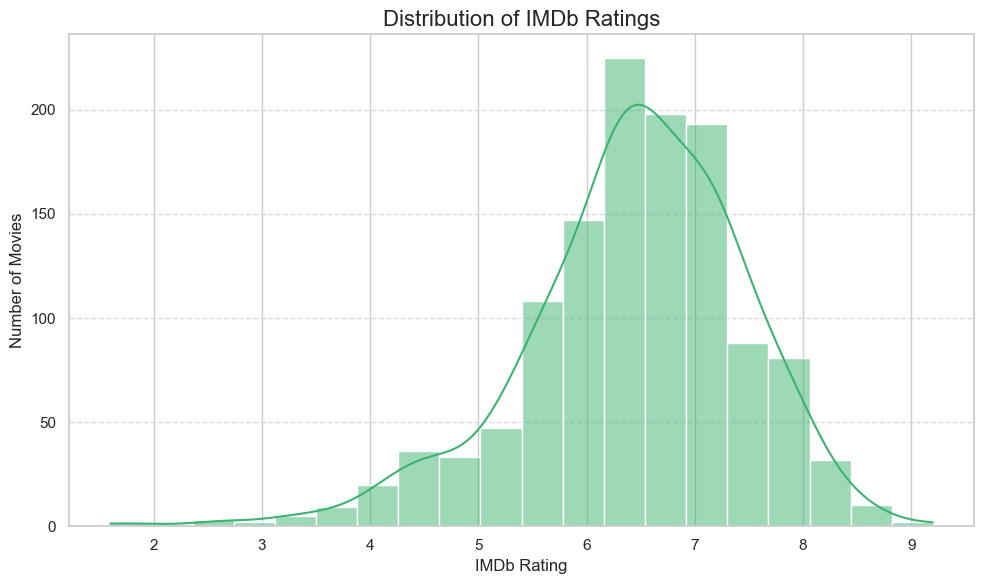

In [759]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_df['averagerating'], bins=20, kde=True, color='mediumseagreen')

# Titles and labels
plt.title('Distribution of IMDb Ratings', fontsize=16)
plt.xlabel('IMDb Rating', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


- The histogram displays the distribution of IMDb average ratings for movies in the dataset.

- Most movies have ratings between 6.0 and 7.0 forming a clear central cluster.

- The distribution is slightly left skewed with fewer movies having extremely low or high ratings.

- This suggests that the majority of films received moderate to good audience reception.


#### 5.1.2 Distribution of Movie Runtimes

Movie runtime is an important production factor that affects both audience engagement and scheduling in cinemas. Analyzing the distribution of runtimes helps identify common industry standards and potential outliers.

The visualization below shows how movie durations vary across the dataset. This will help the studio decide whether to align future projects with typical runtime expectations or explore other durations.


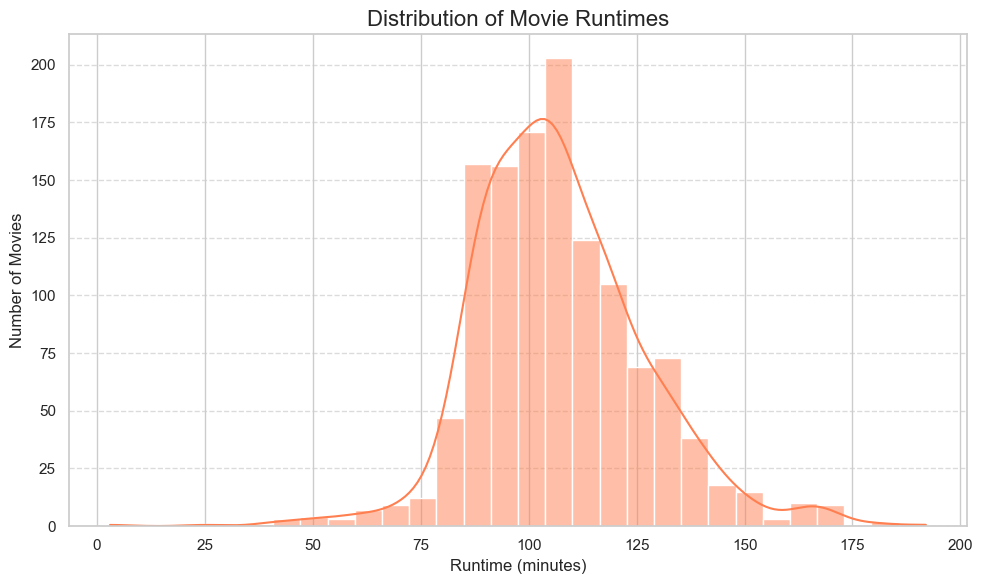

In [760]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of movie runtimes
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_df['runtime_minutes'], bins=30, kde=True, color='coral')

# Titles and labels
plt.title('Distribution of Movie Runtimes', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


- A histogram was used to show the distribution of movie runtimes.

- The most common runtimes fall between 90 and 120 minutes with a peak around 105 minutes.

- The distribution is slightly right skewed with a few outliers exceeding 150 minutes.

- This suggests that most movies follow a standard feature length format with only a few having very long productions.



### 5.1.3 Distribution of Production Budgets

Understanding how much is usually spent on movie production helps identify common spending patterns and spot outliers.

The chart below shows how production budgets are distributed in the dataset.


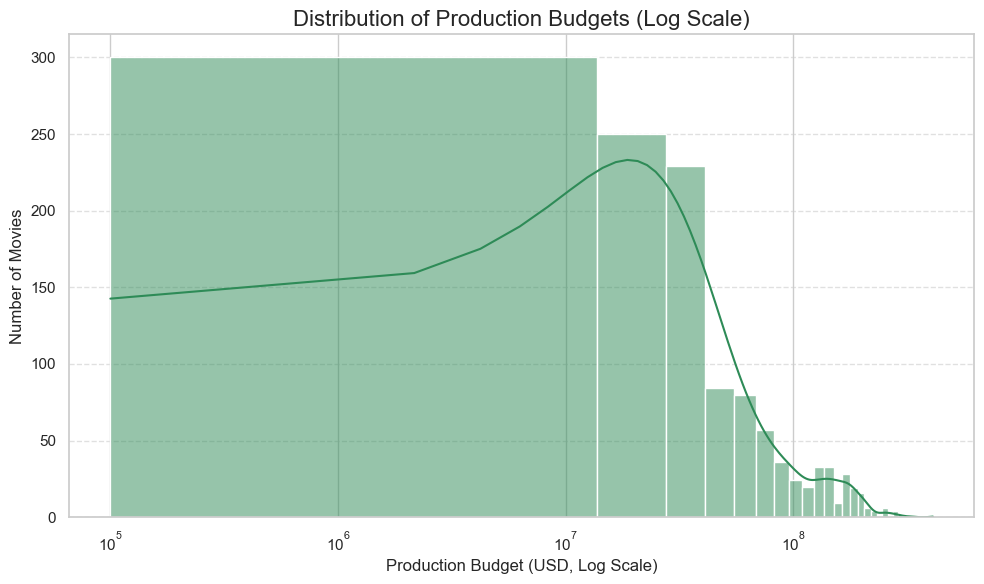

In [767]:
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_df['production_budget'], bins=30, kde=True, color='#2E8B57')
plt.xscale('log')
plt.title('Distribution of Production Budgets (Log Scale)', fontsize=16)
plt.xlabel('Production Budget (USD, Log Scale)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- This histogram shows the distribution of production budgets plotted on a logarithmic scale to manage wide variations in values.

- The majority of films had production budgets between $1 million and $100 million.

- A long right tail indicates a smaller group of very high budget films exceeding $200 million.

- The plot shows the skewed nature of film budgeting with most movies being produced on moderate budgets.


#### 5.1.4 Distribution of Worldwide Gross Revenue

This analysis explores how much revenue movies earned globally.

It helps identify common earning ranges and see unusually successful or underperforming films. Due to wide differences in revenue, a log scale is used for better visibility.


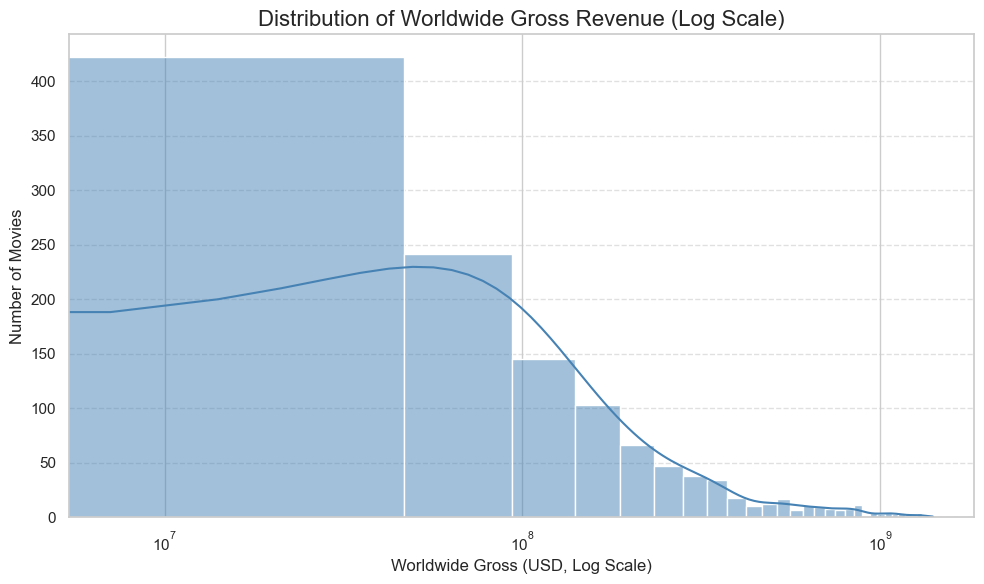

In [768]:
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_df['worldwide_gross'], bins=30, kde=True, color='#4682B4')  

plt.xscale('log')
plt.title('Distribution of Worldwide Gross Revenue (Log Scale)', fontsize=16)
plt.xlabel('Worldwide Gross (USD, Log Scale)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- The histogram illustrates worldwide gross revenue for movies also plotted on a log scale due to the large range in values.

- Most movies earned under $200 million with a large concentration below $100 million.

- A few movies stand out as extreme outliers grossing over $1 billion.

- This indicates that while blockbuster hits exist the majority of films generate moderate returns.


### 5.1.5 Analysis of Movie Genres and Their Average Worldwide Gross

This section examines the relationship between genres and worldwide_gross.  

The objective is to determine which movie genres generate the highest average box office revenue. This directly answers Business Question 1, which seeks to identify the most financially successful genres.  

To visualize this, a horizontal bar plot is used to show the top 10 genres with the highest average worldwide gross revenue. This chart will enable comparison of genre performance clearly and draw actionable insights for production focus.


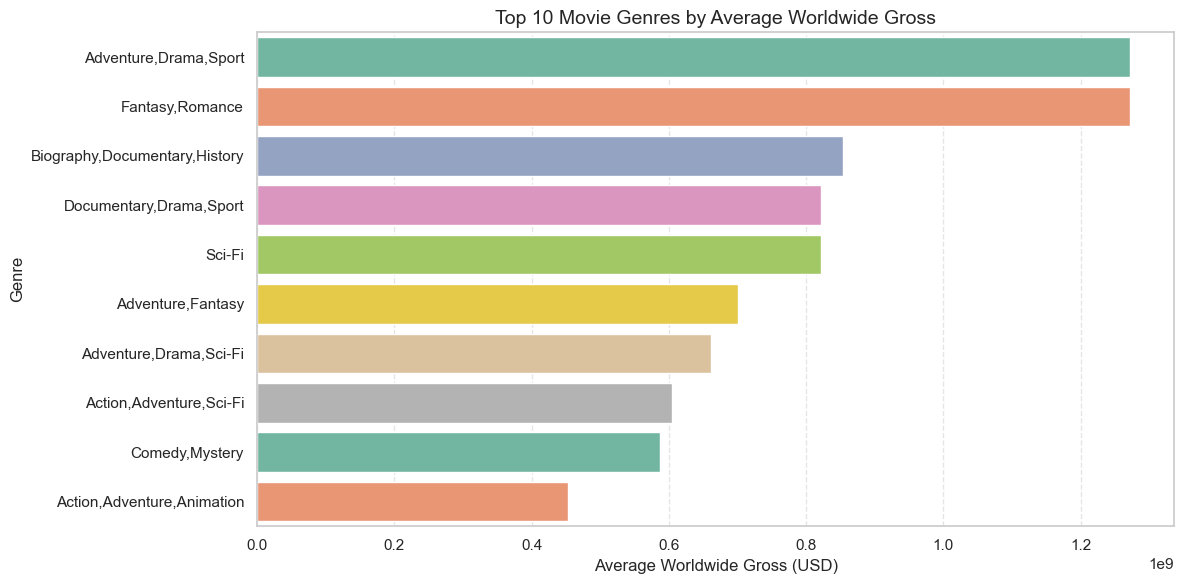

In [792]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by genres and calculate mean worldwide gross
genre_revenue = final_merged_df.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_revenue.values,
    y=genre_revenue.index,
    palette='Set2'
)

plt.title('Top 10 Movie Genres by Average Worldwide Gross', fontsize=14)
plt.xlabel('Average Worldwide Gross (USD)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- The bar chart shows the top 10 movie genres ranked by their average worldwide gross (USD).

- The genre Adventure, Drama, Sport had the highest average worldwide gross slightly above 1.2 billion USD.

- It was closely followed by Fantasy, Romance  just above 1.2 billion USD.

- Other high performing genres included Biography, Documentary, History at about 0.9B USD.

- Documentary, Drama, Sport at about 0.85B USD.

- Sci-Fi at about 0.83B USD.

- The lowest among the top 10 was Action, Adventure, Animation with an average gross slightly above 0.45 billion USD.

- Each genre listed represents a classification from the dataset and shows how certain genre combinations attract higher global revenue. This directly answers Business Question 1: "Which movie genres have the highest average box office revenue?" providing clear evidence for genre based strategic decisions.


#### 5.1.6 Average Worldwide Gross by Release Month

To answer the third business question "What are the best months to release a movie for high box office revenue?"  a univariate analysis is performed based on the release_month variable.

This analysis groups movies by their release month and calculates the average worldwide gross for each. By visualizing this data, the aim is to identify trends in seasonal performance which can inform strategic release timing for future films to maximize revenue potential.


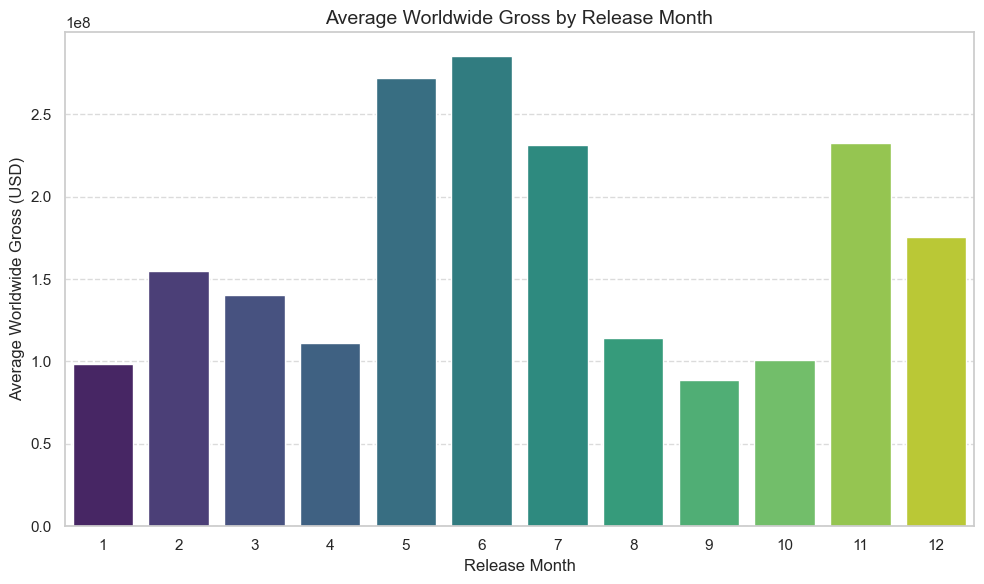

In [796]:
# Extract month from release_date
final_merged_df['release_month'] = pd.to_datetime(final_merged_df['release_date'], errors='coerce').dt.month

# Group by month and calculate average worldwide gross
avg_gross_by_month = final_merged_df.groupby('release_month')['worldwide_gross'].mean().sort_values(ascending=False)

#  Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_gross_by_month.index, y=avg_gross_by_month.values, palette='viridis')
plt.title('Average Worldwide Gross by Release Month', fontsize=14)
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Average Worldwide Gross (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart illustrates the average worldwide gross revenue (in USD) for movies released in each calendar month.

- June (month 6) records the highest average worldwide gross followed closely by May (month 5) and November (month 11).

- July (month 7) and December (month 12) also perform strongly indicating they are favourable months for revenue.

- September (month 9) has the lowest average gross followed by January (month 1) and October (month 10).

- Average performance is seen in February (month 2), March (month 3), April (month 4) and August (month 8).

These results suggest that releasing movies in May and June and November and December may be more profitable.

### 5.2 Bivariate Analysis

This section explores the relationships between two numerical variables to uncover patterns or trends that might not be visible when looking at each variable separately.

This section begins by analyzing how production budgets relate to worldwide gross revenue and then examines how budget levels might influence movie ratings or popularity. These insights can help inform decisions about where investments may lead to higher returns or audience approval.


### 5.2.1 Relationship Between Production Budget and Worldwide Gross

This plot explores how a movie's production budget relates to its worldwide gross revenue. Understanding this relationship helps evaluate whether higher investments result in greater financial returns.


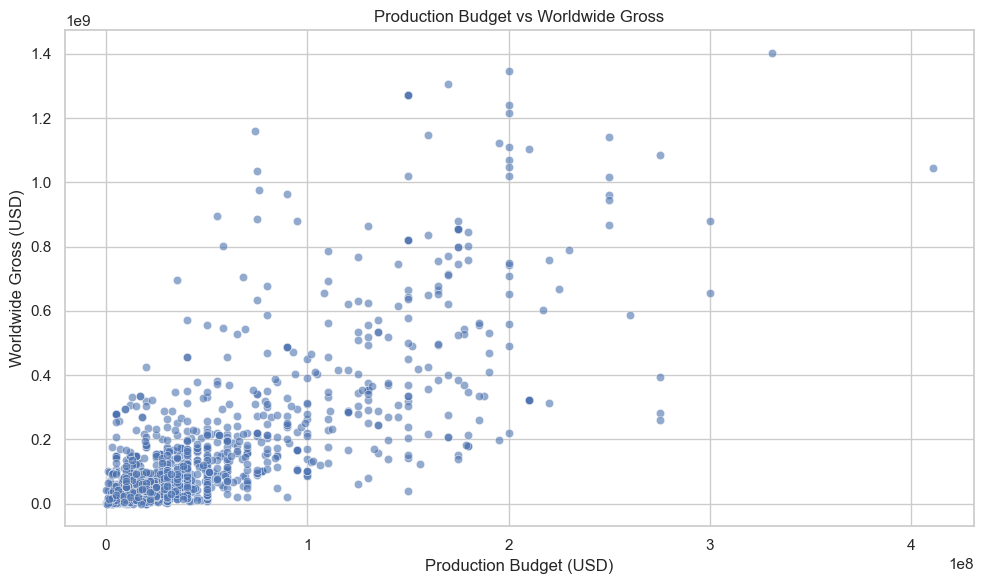

In [773]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=final_merged_df,
    x='production_budget',
    y='worldwide_gross',
    alpha=0.6
)
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Worldwide Gross (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


- A scatter plot was used to compare the production budget of each movie with its worldwide gross revenue.

- Each point represents one movie with the x-axis showing the budget and the y-axis showing how much it earned globally.  

- While some movies with high budgets earned high revenue there is a wide spread indicating that budget alone does not determine success.  

- Many low budget movies had low earnings but a few achieved strong performance. 
 
- This chart helps identify patterns in how spending relates to global box office returns.


### 5.2.2 Relationship Between Production Budget and IMDB Rating

This scatter plot is used to examine whether there is any visible relationship between how much was spent on making a movie, the production budget, and how audiences rated it on IMDB. This helps determine if bigger budgets lead to higher viewer satisfaction.


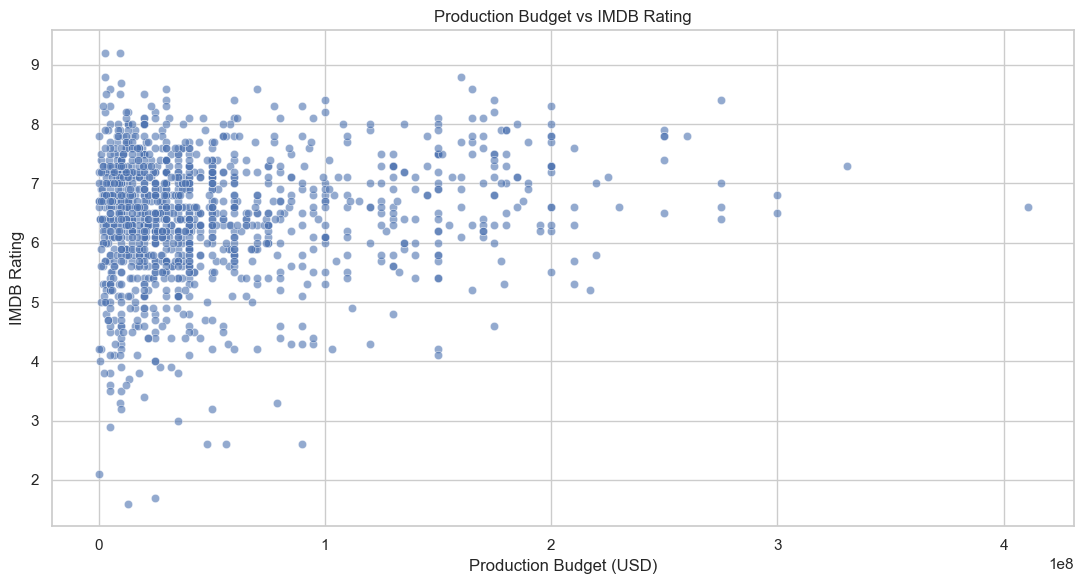

In [775]:
plt.figure(figsize=(11, 6))
sns.scatterplot(data=final_merged_df, x='production_budget', y='averagerating', alpha=0.6)
plt.title('Production Budget vs IMDB Rating')
plt.xlabel('Production Budget (USD)')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


- A scatter plot was created to explore how production budgets relate to IMDB ratings across movies.

- The x-axis represents the Production Budget (USD) while the y-axis shows the IMDB Rating. Each dot is a movie.

- Most low budget films are clustered in the lower range of the x-axis with ratings spread between 4 and 8. Higher budget films are fewer but still show a wide range of ratings.

- There is no clear trend showing that higher production budgets lead to higher ratings. This shows that spending more does not guarantee better audience reception.

#### 5.2.3 Relationship Between IMDB Rating and Worldwide Gross

In this section, the relationship between a movie’s IMDB rating and the revenue it generates worldwide is explored. This can help to understand if higher rated movies perform better financially or if audience ratings and commercial success are unrelated.

A scatter plot will be used to visualize this relationship with each point representing a single movie.


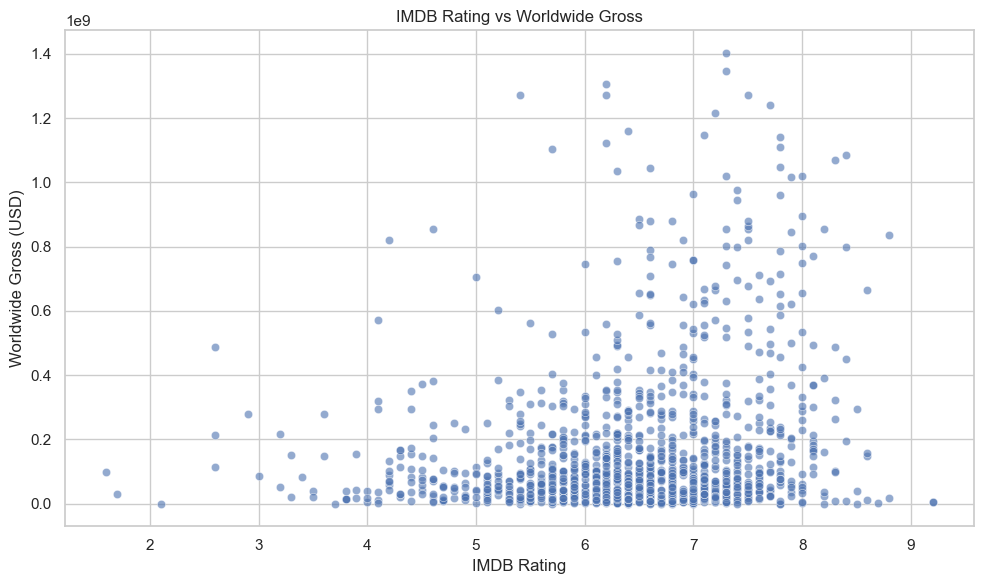

In [782]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_merged_df, x='averagerating', y='worldwide_gross', alpha=0.6)
plt.title('IMDB Rating vs Worldwide Gross')
plt.xlabel('IMDB Rating')
plt.ylabel('Worldwide Gross (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


- A scatter plot was used to examine how IMDB ratings relate to a movie’s worldwide gross revenue.

- Each dot represents a single movie, with its IMDB rating on the x-axis and its total gross revenue on the y-axis.

- The chart shows that while most movies cluster around moderate ratings and earnings a few highly rated films which is 7 and above achieved extremely high gross earnings exceeding $1 billion.

- There is no clear linear relationship. Some highly rated movies earned low amounts and vice versa.

- This suggests that although IMDB rating might have an influence, it is not a strong or consistent predictor of worldwide gross earnings.


#### 5.2.4 Relationship Between Runtime and IMDB Rating

This section explores the relationship between a movie's runtime and its IMDB rating.

By plotting a scatter plot of Runtime; Minutes versus IMDB Rating, the aim is to identify whether longer movies tend to be rated higher or lower by audiences. This analysis helps determine if runtime has any observable effect on how well a movie is received.

The scatter plot allows us to visually inspect the spread and any trends that may exist between the two variables.


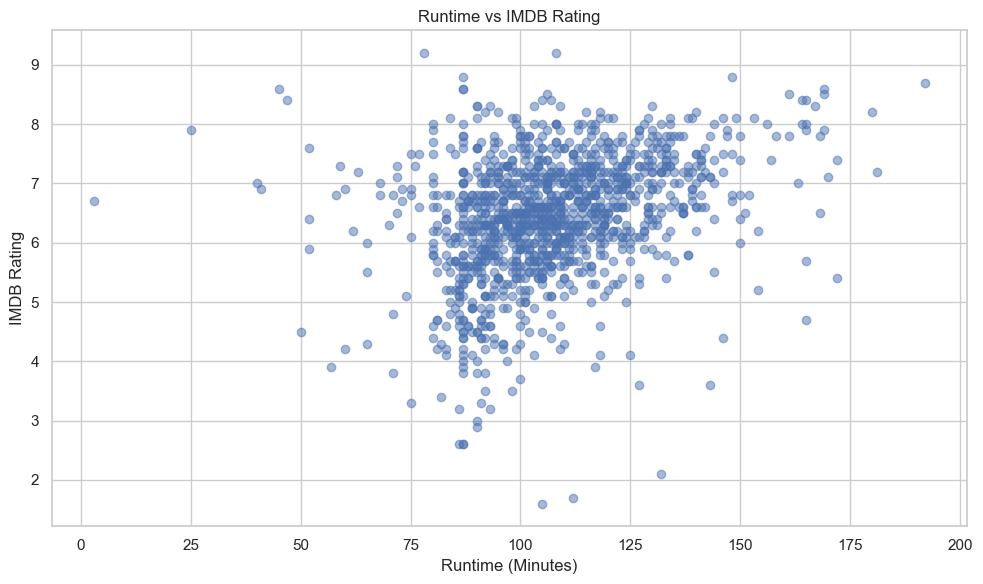

In [783]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    final_merged_df['runtime_minutes'],
    final_merged_df['averagerating'],
    alpha=0.5
)

plt.title('Runtime vs IMDB Rating')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('IMDB Rating')
plt.tight_layout()
plt.show()


This scatter plot explores the relationship between a movie's runtime and its IMDB rating. Each point represents a single movie.

- The x-axis shows the runtime in minutes, while the y-axis displays the IMDB rating.

- Most movies are concentrated around the 90–120 minute range and have average to high ratings.

- There is an upward trend showing that longer movies might receive slightly better ratings on average.

- However, the spread indicates variability, meaning runtime alone does not guarantee a higher rating.

Overall, while longer movies may tend to perform better in ratings, other factors likely contribute more strongly to audience perception and rating outcomes.


### 5.2.5 Relationship Between Runtime and Worldwide Gross

This section explores whether a movie’s runtime has any impact on how much revenue it generates globally. 

A scatter plot will be used to visualize the relationship between a movie’s length in minutes and its worldwide gross revenue. Each point on the chart represents a movie.


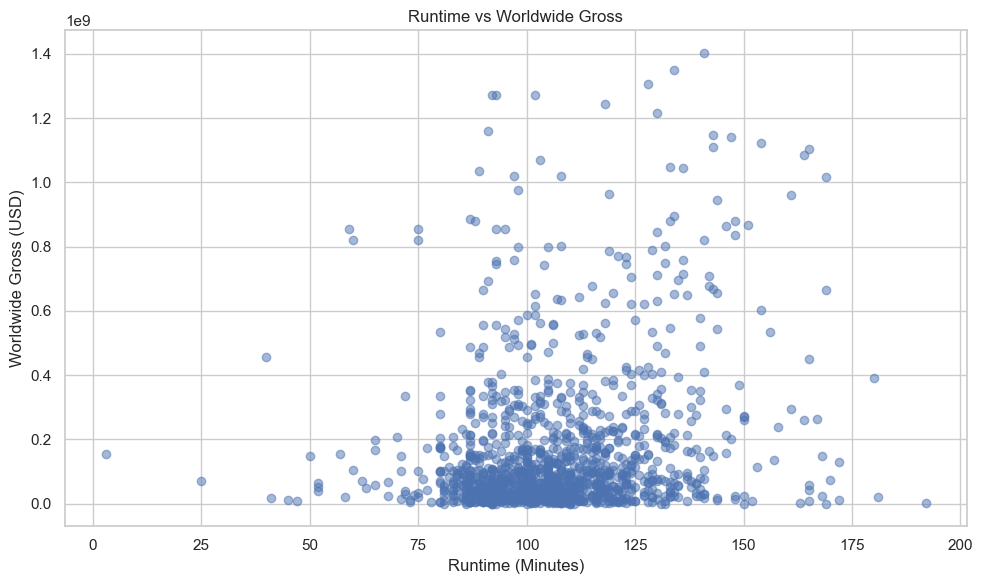

In [784]:
plt.figure(figsize=(10, 6))
plt.scatter(
    final_merged_df['runtime_minutes'],
    final_merged_df['worldwide_gross'],
    alpha=0.5
)

plt.title('Runtime vs Worldwide Gross')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Worldwide Gross (USD)')
plt.tight_layout()
plt.show()


- The scatter plot shows a high concentration of movies with runtimes between 80–120 minutes, which is typical for most films.

- While there are several outliers with very high gross revenue especially in the 90–150 minute range, the overall distribution shows no strong linear relationship between runtime and revenue.

- A longer runtime does not guarantee higher earnings but some high grossing blockbusters do fall within that range.

- The scattered nature of the data indicates that factors beyond just runtime, such as genre, marketing, cast and release timing play a role in box office performance.


#### 5.2.6 Relationship Between Release Year and IMDB Rating

The analysis explores whether the release year of a film influences how well it is rated on IMDB.

A scatter plot will be used to visualize any potential patterns between the time a movie was released and its audience rating.


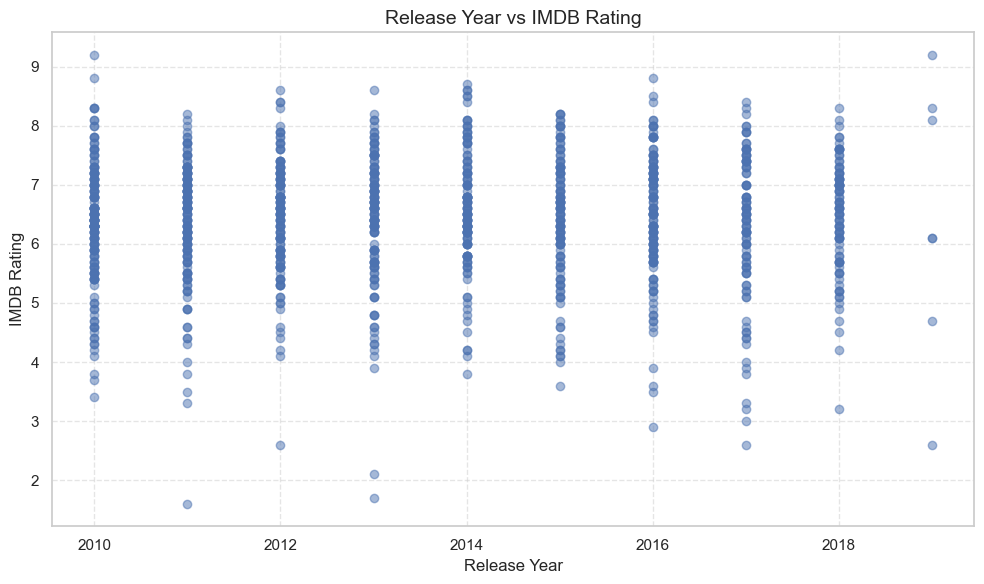

In [787]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    final_merged_df['start_year'],
    final_merged_df['averagerating'],
    alpha=0.5
)

plt.title('Release Year vs IMDB Rating', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('IMDB Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- The scatter plot displays IMDB ratings for movies released between 2010 and 2019. The data points are vertically clustered around discrete years indicating that only a limited number of years are represented in the dataset.

- Most movies across all years have IMDB ratings between 5.0 and 7.5 with a few outliers above 8.5 and below 4.0. There is no clear upward or downward trend in ratings over the years showing that the release year does not have a strong correlation with audience rating. 

- The consistent spread of ratings across time indicates that movie quality has remained stable throughout the decade.


### 5.3 Multivariate Analysis

In this section, multiple variables are explored and they interact with one another. Unlike univariate or bivariate analysis, multivariate analysis helps uncover more complex relationships that may exist between different aspects of the dataset.

To do this, the movie's budget and runtime are analyzed and they relate to its IMDB rating. This can reveal whether longer and more expensive films tend to be rated higher by audiences.


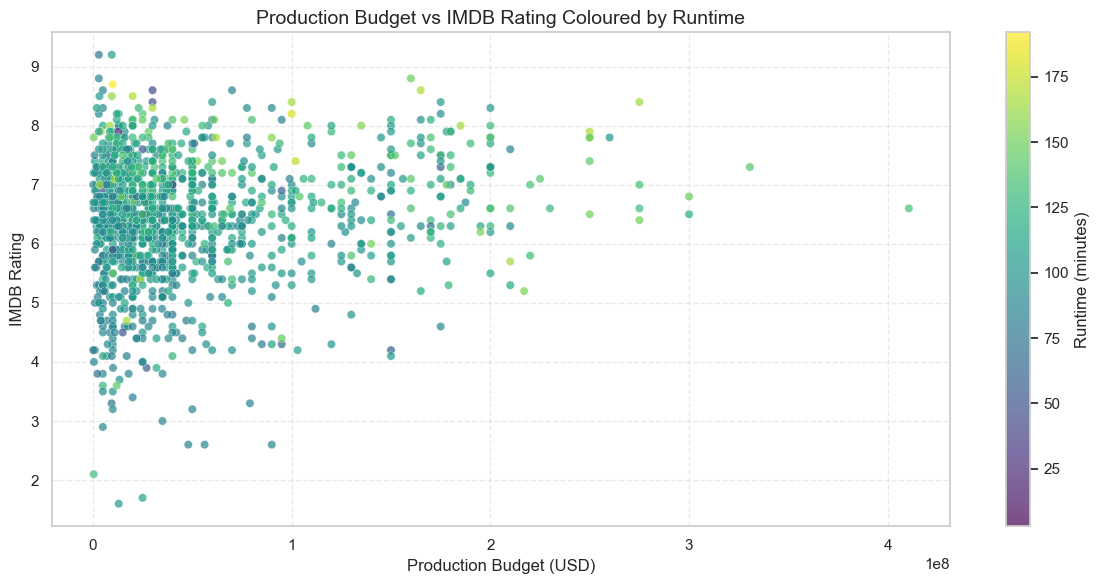

In [793]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    final_merged_df['production_budget'],
    final_merged_df['averagerating'],
    c=final_merged_df['runtime_minutes'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='white',
    linewidths=0.3
)

plt.title('Production Budget vs IMDB Rating Coloured by Runtime', fontsize=14)
plt.xlabel('Production Budget (USD)', fontsize=12)
plt.ylabel('IMDB Rating', fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_label('Runtime (minutes)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


- The scatter plot above examines the relationship between Production Budget and IMDB Rating with Runtime in minutes. This multivariate visualization enables to exploration of how these three variables interact.

- X-axis (Production Budget): Most films are clustered under $100 million with a few high budget outliers.
- Y-axis (IMDB Rating): IMDB ratings fall between 4.0 and 8.0 with a majority of films rated between 6.0 and 7.5.
- Color (Runtime): Shorter runtimes are scattered throughout the plot while longer runtimes appear more frequently in films with higher budgets and slightly higher ratings.

- There is no negative correlation between budget and IMDB rating. Higher production spending does not guarantee better audience reception.

- However, many of the higher rated films that are above 7.5 appear to be associated with moderate to high budgets and longer runtimes.

- Low-budget films span a wide range of ratings but usually to have shorter runtimes.

- Outliers with very low ratings that are below 4.0 exist across all budget levels showing that both high and low budget productions can underperform.

This plot explains that while runtime and budget may influence audience ratings to some extent, neither can predict a film’s success on IMDB.


#### 5.3.1 Multivariate Analysis Key Findings

- Movies with moderate budgets of under $100 million usually cluster around IMDb ratings of 6.0 to 7.5 regardless of runtime.

- Higher budget films of over $100 million show a wider spread in ratings indicating that large investments do not always translate to higher audience satisfaction.

- Runtime has minimal influence on IMDb rating when considered alongside budget. Both short and long films receive a wide range of ratings.

- Most films in the dataset fall within the $0–$50 million production budget and runtime of 80 – 120 minutes showing a trend in production planning.

- There is no strong linear correlation between production budget and IMDb rating showing that other factors can play key roles in audience reception.

### 5.4 Summary of Key Findings

- Action, Adventure, and Animation genres generated the highest average worldwide gross revenue showing these genres are the most commercially successful.

- There is a positive correlation between production budgets and worldwide gross, indicating that higher investments tend to result in higher returns.

- Movies released in May, June and July recorded the highest average worldwide earnings showing these months as the best for release timing.

These insights can guide the studio to focus on top performing genres, allocate budgets strategically and schedule releases during peak months to maximize box office performance.


## 6.0 Conclusion and Recommendations

### 6.1 Conclusion

The project applied data analysis and visualizations to help the new movie studio make decisions backed by evidence on film production and release strategies. By exploring relationships between movie genres, budgets, release months and box office performance, the analysis revealed important patterns that can inform high revenue strategies. These insights provide a foundation for making data informed production and scheduling choices that align with commercial success.

### 6.2 Recommendations

1. Prioritize Action, Adventure and Animation genres which consistently show the highest average gross revenues. The genres offer strong return on investment potential.

2. Target releases during peak-performing months, especially May, June, July and November which showed the highest average box office earnings.

3. Use data driven release planning by continuously evaluating performance metrics and aligning them with the current trends and genre strengths.

These actionable recommendations will help support informed evidence-based decision-making as the studio grows its film portfolio.